# Data analysis on the Titanic Dataset

### Questions to answer:

1. Who were the passengers on the Titanic?
2. What deck were the passengers on?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped someone survive the sinking?
6. Did having a family member increase the odds of surviving the crash?
7. Did the deck have an effect on the passengers survival rate?

link: https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

##visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the data

In [ ]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head() ##print the first 5 rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.shape

(891, 12)

## Question 1: Who were the passengers on the Titanic?

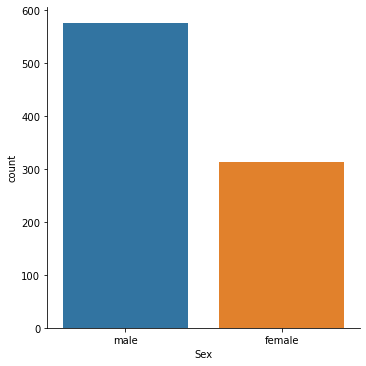

In [ ]:
##print a catplot to shows the values of the Sex (male or female) column.
sns.catplot(x='Sex',data=titanic_df, kind='count')

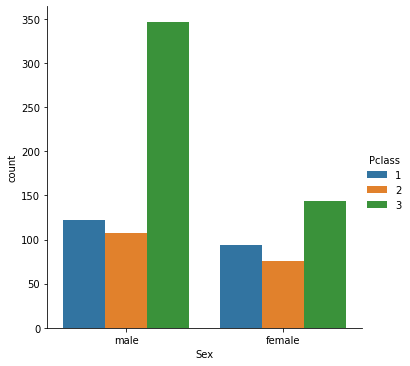

In [ ]:
##print a catplot to show the sex distrbution into the difference classes.
sns.catplot(x='Sex',data=titanic_df,kind ='count',hue='Pclass')

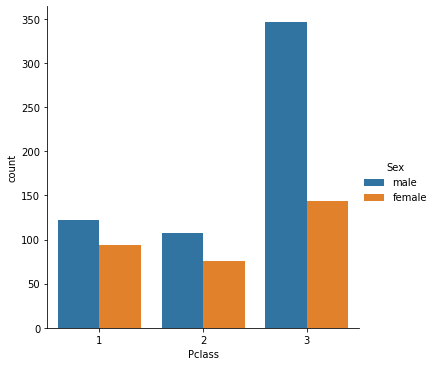

In [ ]:
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')

In [ ]:
##define a function to show not just sex but male/female and children
def male_female_child(passenger):
    age,sex=passenger

    if age<16:
        return 'child'
    else:
        return sex

In [ ]:
##apply the function and create a new column
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


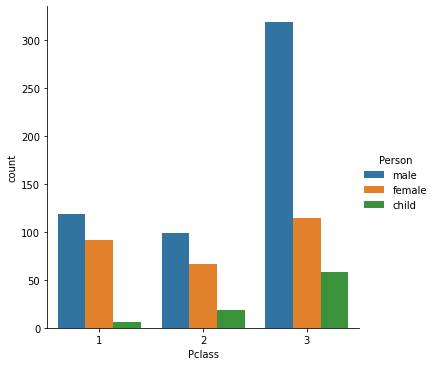

In [ ]:
sns.catplot(x='Pclass',data=titanic_df,hue='Person',kind='count')

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

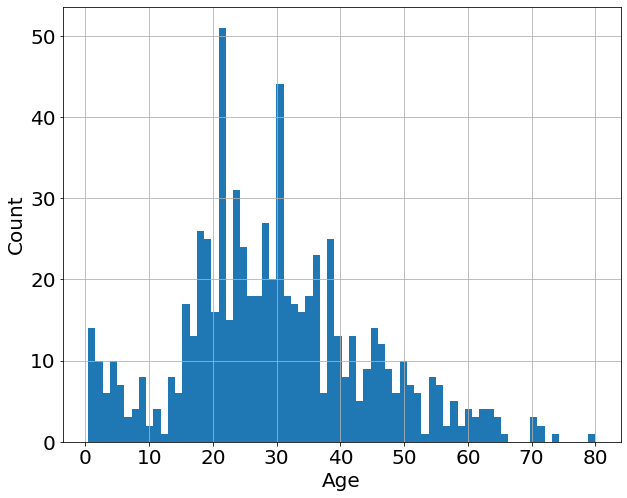

In [ ]:
##show the distribution of age of all the passengers
titanic_df['Age'].hist(bins=70,figsize = (10,8))

plt.xlabel('Age',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [ ]:
##average age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [ ]:
##show the breakdown of the passengers
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

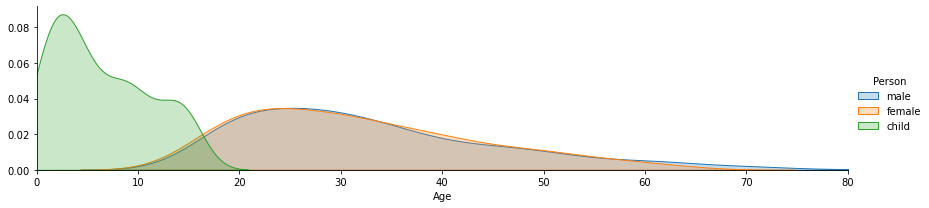

In [ ]:
## plot a kdeplot for person(male,female,child)
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))

fig.add_legend()

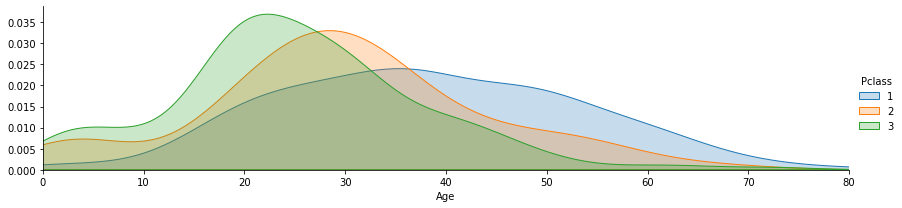

In [ ]:
## plot a kdeplot for Pclass
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))

fig.add_legend()

## 2. What deck were the passengers on?

In [ ]:
print(titanic_df.shape)
titanic_df.head()

(891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
#titanic_df['Cabin'].fillna('Z',inplace=True)
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

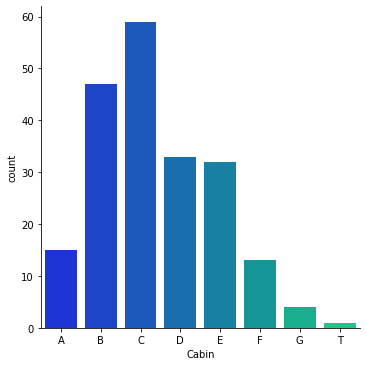

In [ ]:
levels = []

#to get the first alphabet of the cabin they are in
for level in deck:
    levels.append(level[0])

#print(levels)

cabin_df = pd.DataFrame(levels)
cabin_df.columns= ['Cabin']


#plot the categorical plot base on the different type of cabin they are in
sns.catplot(x='Cabin',data=cabin_df.sort_values('Cabin'),palette='winter',kind='count')


In [ ]:
cabin_df.value_counts()

Cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
dtype: int64

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


## 3. Where did the passengers come from?

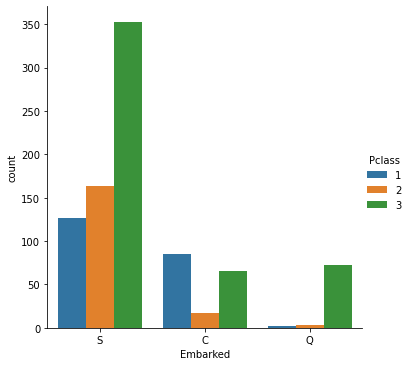

In [ ]:
#embarked is which city they embarked on. can refer to kaggle for more details
# s = Southampton, c = Cherboug, q = Queenstown

#plot to find how which passengers are in which class
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count')

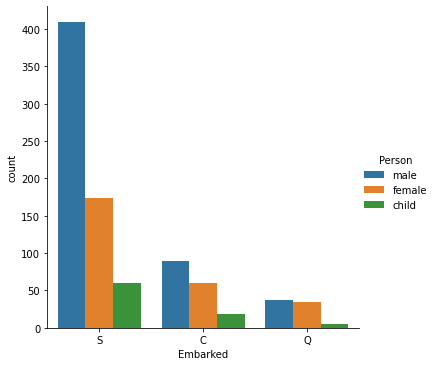

In [ ]:
#plot to find out the tpye of the passengers(male,femlae or person) from each city

sns.catplot(x='Embarked', data=titanic_df, hue='Person', kind='count')

## 4. Who was alone and who was with family?

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
#make a column to define passengers who are alone
#so any value more than zero means they had a family (sibiling,parents,cjild)
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [ ]:
#notice that the alone columns has been added
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [ ]:
#now rename the 0 to alone and more than 0 to be with a family
titanic_df['Alone'].loc[titanic_df.Alone>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df.Alone==0] = 'Alone'

C:\Users\eugene\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


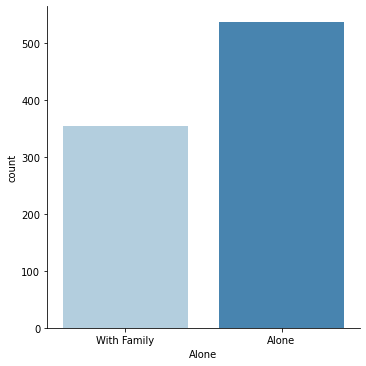

In [ ]:
sns.catplot(x='Alone',data=titanic_df,kind='count',palette='Blues')

## 5. What factors helped someone survive the sinking?

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


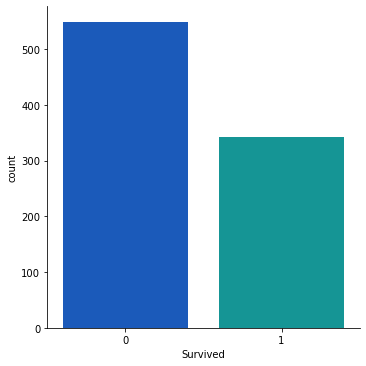

In [ ]:
sns.catplot(x='Survived', data= titanic_df, kind='count', palette='winter')

In [ ]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


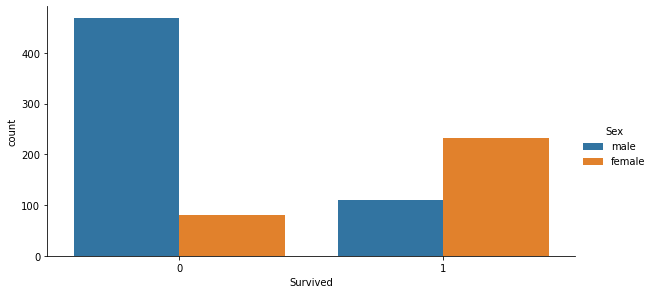

In [ ]:
sns.catplot(x='Survived',hue='Sex',kind='count',data=titanic_df, height =4, aspect =2)

C:\Users\eugene\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


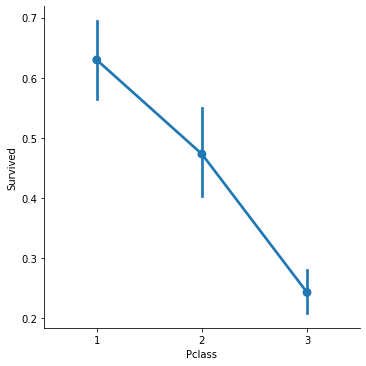

In [ ]:
sns.factorplot(x='Pclass',y='Survived', data=titanic_df)

C:\Users\eugene\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


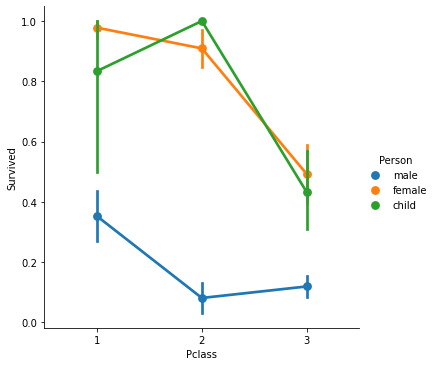

In [ ]:
## plot to see the trend of age vs Pclass
sns.factorplot(x='Pclass',y='Survived', data=titanic_df, hue='Person')

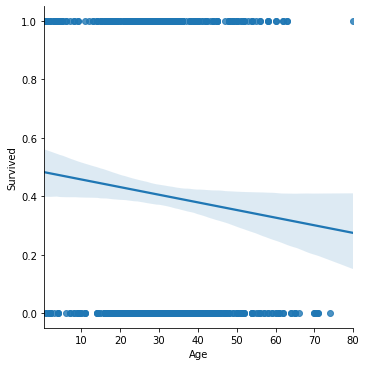

In [ ]:
## lmplot to see the age vs survivor
sns.lmplot(x='Age',y='Survived', data=titanic_df)

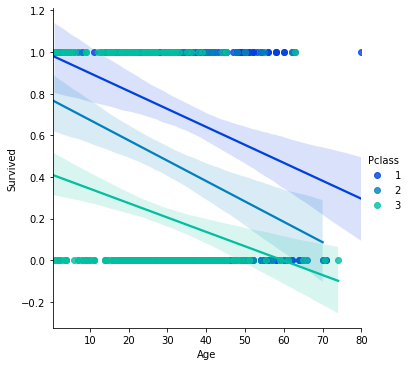

In [ ]:
## add in the class to the age vs survivor

sns.lmplot(x='Age',y='Survived', data=titanic_df, hue='Pclass',palette='winter')

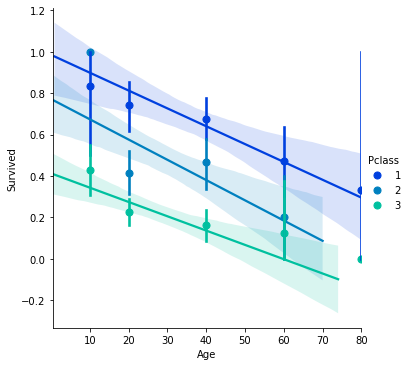

In [ ]:
generations =[10,20,40,60,80,90]
sns.lmplot(x='Age',y='Survived', data=titanic_df, hue='Pclass',palette='winter',x_bins=generations)

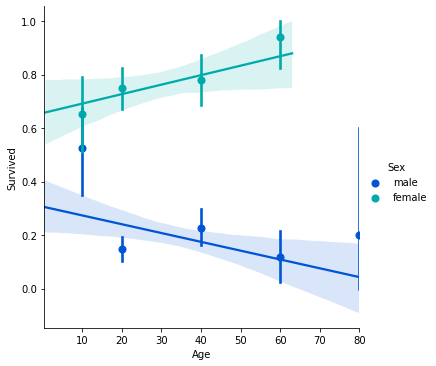

In [ ]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df, palette='winter',x_bins=generations)

## 6. Did having a family member increase the odds of surviving the crash?

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [ ]:
pd.crosstab(titanic_df['Alone'],titanic_df['Survived'])

Survived,0,1
Alone,,
Alone,374,163
With Family,175,179


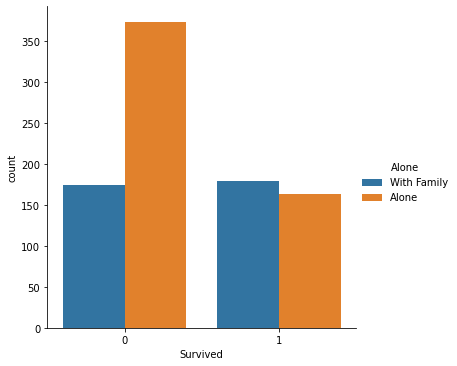

In [ ]:
#plot alone column vs survived column

sns.catplot(x='Survived',hue='Alone',data=titanic_df,kind='count')
##can see that generally more people who has a family survived

## 7. Did the deck have an effect on the passengers survival rate?

In [ ]:
print(cabin_df.head())
print(cabin_df.shape)

  Cabin
0     C
1     C
2     E
3     G
4     C
(204, 1)


In [ ]:
#drop na values in the cabin column
titanic_df = titanic_df.dropna(subset=['Cabin'])

In [ ]:
##need to reset index first
titanic_df=titanic_df.reset_index(drop=True)

In [ ]:
titanic_df['Deck']=cabin_df

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Deck
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,G
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,C


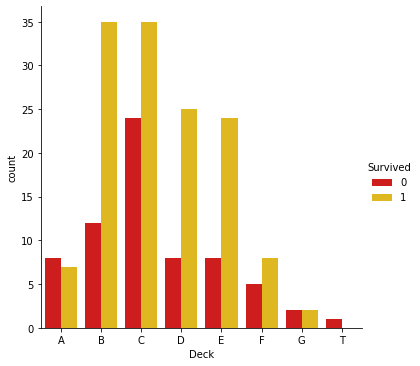

In [ ]:
#plot a cat plot for deck vs survived to see which deck has a higher survivor rate
sns.catplot(x='Deck',hue='Survived',data=titanic_df.sort_values('Deck'),kind='count',palette='hot')

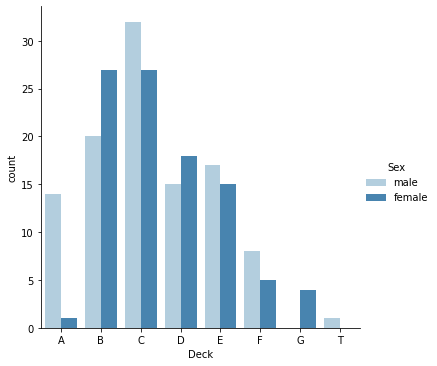

In [ ]:
#plot to see the person breakdown in each deck
sns.catplot(x='Deck',hue='Sex',data=titanic_df.sort_values('Deck'),kind='count',palette='Blues')

C:\Users\eugene\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


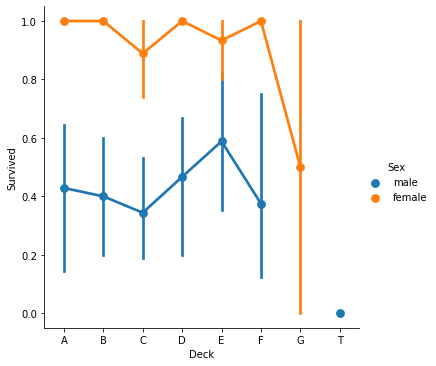

In [ ]:
#plot to see if a male or female in a certain will have a higher survival rate
sns.factorplot(x='Deck',y='Survived', data=titanic_df.sort_values(['Deck']), hue='Sex')